# Installation

 - Run these commands
     
     - git clone https://github.com/Tessellate-Imaging/Monk_Object_Detection.git
     
     - cd Monk_Object_Detection/3_mxrcnn/installation
     
 - Select the right requirements file and run
 
     - cat requirements_cuda9.0.txt | xargs -n 1 -L 1 pip install

# About the Network

1. Blog 1 on VGG Network - https://towardsdatascience.com/vgg-neural-networks-the-next-step-after-alexnet-3f91fa9ffe2c

2. Blog 2 on VGG Network - https://medium.com/coinmonks/paper-review-of-vggnet-1st-runner-up-of-ilsvlc-2014-image-classification-d02355543a11

3. Blog 1 on rcnn - https://medium.com/coinmonks/review-r-cnn-object-detection-b476aba290d1

4. Blog 2 on rcnn - https://towardsdatascience.com/r-cnn-3a9beddfd55a

5. Blog 1 on fast-rcnn - https://medium.com/coinmonks/review-fast-r-cnn-object-detection-a82e172e87ba

6. Blog 2 on fast-rcnn - https://towardsdatascience.com/part-2-fast-r-cnn-object-detection-7303e1988464

7. Blog 1 on faster rcnn - https://towardsdatascience.com/review-faster-r-cnn-object-detection-f5685cb30202

8. Blog 2 on faster rcnn - https://www.analyticsvidhya.com/blog/2018/11/implementation-faster-r-cnn-python-object-detection/

# COCO Format

## Dataset Directory Structure

    ../sample_dataset (root_dir)
          |
          |------kangaroo (coco_dir) 
          |         |
          |         |---Images (img_dir)
          |         |----|
          |              |-------------------img1.jpg
          |              |-------------------img2.jpg
          |              |-------------------.........(and so on)
          |
          |
          |         |---annotations (anno_dir)
          |         |----|
          |              |--------------------instances_Train.json 
          |              |--------------------classes.txt
          
          
 - instances_Train.json -> In proper COCO format
 - classes.txt          -> A list of classes in alphabetical order

In [1]:
import os
import sys
sys.path.append("../../3_mxrcnn/lib/")
sys.path.append("../../3_mxrcnn/lib/mx-rcnn")

In [2]:
from train_base import *

In [3]:
# Dataset params

In [4]:
root_dir = "../sample_dataset/";
coco_dir = "kangaroo";
img_dir = "Images"; 

In [5]:
set_dataset_params(root_dir=root_dir, 
                   coco_dir=coco_dir, imageset=img_dir);

In [6]:
# Model Type

In [7]:
set_model_params(model_name="vgg16");

In [8]:
# Hyper Params

In [9]:
set_hyper_params(gpus="0", lr=0.001, lr_decay_epoch="1", epochs=4, batch_size=1);

In [10]:
set_output_params(log_interval=100, save_prefix="model_vgg16");

In [11]:
# Preprocessing params

In [12]:
set_img_preproc_params(img_short_side=600, img_long_side=1000, 
                       mean=(123.68, 116.779, 103.939), std=(1.0, 1.0, 1.0));

In [13]:
# Initialize params

In [14]:
initialize_rpn_params();

In [15]:
initialize_rcnn_params();

In [ ]:
# Remove caches if any

In [ ]:
if os.path.isdir("../sample_dataset/cache/"):
    os.system("rm -r ../sample_dataset/cache/")

In [16]:
# Invoke Dataloader

In [17]:
roidb = set_dataset();

INFO:root:loading cache ../sample_dataset/cache/coco_Images_roidb.pkl
INFO:root:coco_Images num_images 164
INFO:root:filter roidb: 164 -> 164
INFO:root:coco_Images append flipped images to roidb


In [18]:
#Network

In [19]:
sym = set_network();

In [20]:
# Train

In [21]:
train(sym, roidb);

INFO:root:max input shape
{'bbox_target': (1, 36, 62, 62),
 'bbox_weight': (1, 36, 62, 62),
 'data': (1, 3, 1000, 1000),
 'gt_boxes': (1, 100, 5),
 'im_info': (1, 3),
 'label': (1, 1, 558, 62)}
INFO:root:max output shape
{'bbox_loss_reshape_output': (1, 128, 8),
 'blockgrad0_output': (1, 128),
 'cls_prob_reshape_output': (1, 128, 2),
 'rpn_bbox_loss_output': (1, 36, 62, 62),
 'rpn_cls_prob_output': (1, 2, 558, 62)}
INFO:root:locking params
['conv1_1_weight',
 'conv1_1_bias',
 'conv1_2_weight',
 'conv1_2_bias',
 'conv2_1_weight',
 'conv2_1_bias',
 'conv2_2_weight',
 'conv2_2_bias',
 'conv3_1_weight',
 'conv3_1_bias',
 'conv3_2_weight',
 'conv3_2_bias',
 'conv3_3_weight',
 'conv3_3_bias',
 'conv4_1_weight',
 'conv4_1_bias',
 'conv4_2_weight',
 'conv4_2_bias',
 'conv4_3_weight',
 'conv4_3_bias']
INFO:root:lr 0.001000 lr_epoch_diff [1] lr_iters [328]
INFO:root:Epoch[0] Batch [0-100]	Speed: 5.07 samples/sec	RPNAcc=0.924969	RPNLogLoss=0.242810	RPNL1Loss=0.949355	RCNNAcc=0.828202	RCNNLogLoss=

# Running Inference

In [1]:
import os
import sys
sys.path.append("../../3_mxrcnn/lib/")
sys.path.append("../../3_mxrcnn/lib/mx-rcnn")

In [2]:
from infer_base import *

In [3]:
class_file = set_class_list("../sample_dataset/kangaroo/annotations/classes.txt");

In [4]:
#Model - Select the model as per number of iterations it has been trained for

In [5]:
set_model_params(model_name="vgg16", model_path="trained_model/model_vgg16-0004.params");

In [6]:
#Hyper Params

In [7]:
set_hyper_params(gpus="0", batch_size=1);

In [8]:
# Preprocessing

In [9]:
set_img_preproc_params(img_short_side=600, img_long_side=1000, 
                       mean=(123.68, 116.779, 103.939), std=(1.0, 1.0, 1.0));

In [10]:
#Initalization

In [11]:
initialize_rpn_params();

In [12]:
initialize_rcnn_params();

In [13]:
#Network

In [14]:
sym = set_network();
mod = load_model(sym);

In [15]:
#Load Image and infer

kangaroo
 0.9686934351921082 [107.50427734375, 38.5044287109375, 225.21240234375, 165.69142578125]
['kangaroo\n', 0.9686934351921082, [107.50427734375, 38.5044287109375, 225.21240234375, 165.69142578125]]


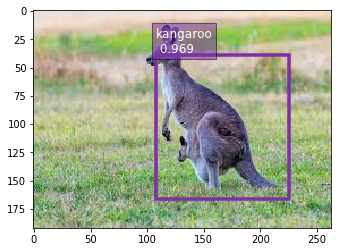

In [15]:
set_output_params(vis_thresh=0.9, vis=True)
Infer("../sample_dataset/kangaroo/test/kg1.jpeg", mod);

kangaroo
 0.980954647064209 [85.31531274424374, 54.85095238389424, 205.96584403629774, 138.6212374880529]
kangaroo
 0.9757524132728577 [184.4068097358314, 39.22181938616665, 303.51990768707327, 116.14681769477758]
kangaroo
 0.967789888381958 [23.32515248494061, 39.49899202252011, 98.4510588849007, 148.00410755155121]
['kangaroo\n', 0.980954647064209, [85.31531274424374, 54.85095238389424, 205.96584403629774, 138.6212374880529]]


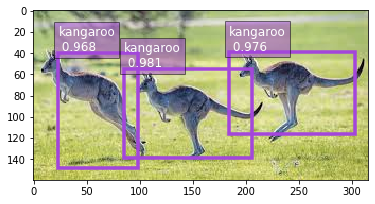

In [16]:
set_output_params(vis_thresh=0.9, vis=True)
Infer("../sample_dataset/kangaroo/test/kg2.jpeg", mod);

kangaroo
 0.9903343319892883 [49.637516763845866, 33.34117709679696, 229.68257520443504, 165.15959181264762]
['kangaroo\n', 0.9903343319892883, [49.637516763845866, 33.34117709679696, 229.68257520443504, 165.15959181264762]]


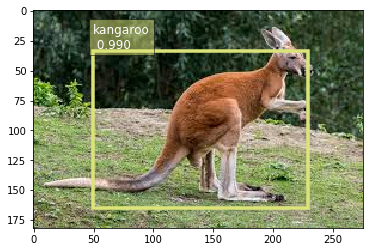

In [17]:
set_output_params(vis_thresh=0.9, vis=True)
Infer("../sample_dataset/kangaroo/test/kg3.jpeg", mod);

kangaroo
 0.9840047359466553 [95.94823837156864, 59.45220478659164, 334.9322833760329, 243.10745208519583]
['kangaroo\n', 0.9840047359466553, [95.94823837156864, 59.45220478659164, 334.9322833760329, 243.10745208519583]]


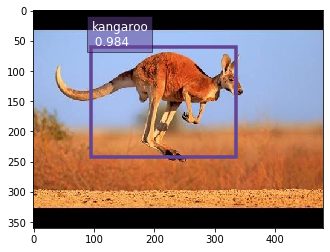

In [18]:
set_output_params(vis_thresh=0.9, vis=True)
Infer("../sample_dataset/kangaroo/test/kg4.jpeg", mod);

kangaroo
 0.9866575598716736 [0.0, 47.76547842611328, 439.0201798237551, 409.974373398617]
kangaroo
 0.8242018222808838 [291.8235004198664, 11.422982763929296, 422.6642811295347, 395.4837346417139]
['kangaroo\n', 0.9866575598716736, [0.0, 47.76547842611328, 439.0201798237551, 409.974373398617]]


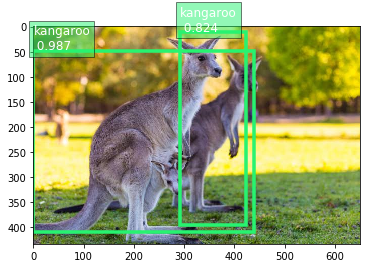

In [19]:
set_output_params(vis_thresh=0.8, vis=True)
Infer("../sample_dataset/kangaroo/test/kg5.jpeg", mod);